In [ ]:
import pandas as pd
import statistics as stat
import ssl                   #load some data
import os
import matplotlib.pyplot as plt
!pip install quandl
import quandl


In [ ]:
!pip install yfinance
!pip install getFamaFrenchFactors

In [ ]:
#import statistics as stat
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import getFamaFrenchFactors as gff

# **PROIECT**

    1. Realizati o analiza a celor doua modele de baza: CAPM, respectiv modelul Fama-French cu 3 factori pe un esantion incepand cu 2000 pentru o actiune de pe S&P500 (aveti grija sa nu folositi aceleasi actiuni).
    2. Realizati o analiza pe un esantion in perioada ultimei crize financiare, 2007-2009, respectiv in perioada pandemiei.
    3. Comentati rezultatele regresiilor dpvd statistic si incercati sa le interpretati si dpvd financiar.
    4. Comentati analiza actiunii pe baza modelului teoretic in raport cu dinamica din eToro.

In [ ]:
ticker = 'MSFT'
start = '2000-1-01'
end = '2024-04-01'

stock_data = yf.download(ticker, start, end, actions=True)

ff3_monthly = gff.famaFrench3Factor(frequency='m')
ff3_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
ff3_monthly.set_index('Date', inplace=True)

stock_returns = stock_data['Adj Close'].resample('M').last().pct_change().dropna()
stock_returns.name = "Month_Rtn"
ff_data = ff3_monthly.merge(stock_returns,on='Date')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
"""
CAPM
"""

rf = ff_data['RF'].mean()
market_premium = ff_data['Mkt-RF'].mean()

X = ff_data['Mkt-RF']
y =  ff_data['Month_Rtn'] - ff_data['RF']
c = sm.add_constant(X)
capm_model = sm.OLS(y, c)
result = capm_model.fit()
print(result.summary())
intercept, beta = result.params

expected_return = rf + beta*market_premium
print("CAPM Expected monthly returns: " + str(expected_return))
yearly_return = expected_return * 12
print("CAPM Expected yearly returns: " + str(yearly_return))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     163.5
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           6.22e-30
Time:                        12:30:42   Log-Likelihood:                 383.36
No. Observations:                 289   AIC:                            -762.7
Df Residuals:                     287   BIC:                            -755.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.004      1.250      0.2

In [ ]:
"""
Fama-French 3 Factors Model
"""

X = ff_data[['Mkt-RF', 'SMB', 'HML']]
y = ff_data['Month_Rtn'] - ff_data['RF']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

rf = ff_data['RF'].mean()
market_premium = ff3_monthly['Mkt-RF'].mean()
size_premium = ff3_monthly['SMB'].mean()
value_premium = ff3_monthly['HML'].mean()

expected_monthly_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium
expected_yearly_return = expected_monthly_return * 12
print("Expected yearly return: " + str(expected_yearly_return))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     72.04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.05e-34
Time:                        12:30:42   Log-Likelihood:                 399.76
No. Observations:                 289   AIC:                            -791.5
Df Residuals:                     285   BIC:                            -776.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.004      1.663      0.0

In [ ]:
# datele pentru microsoft
microsoft_data = yf.download(ticker, start='2000-01-01', end='2024-04-01')

print("Criza financiară (2007-2009)")
crisis_start = '2007-01-01'
crisis_end = '2009-12-31'
crisis_data = microsoft_data.loc[crisis_start:crisis_end]

ff3_monthly = gff.famaFrench3Factor(frequency='m')
ff3_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
ff3_monthly.set_index('Date', inplace=True)

microsoft_returns = crisis_data['Adj Close'].resample('M').last().pct_change().dropna()
microsoft_returns.name = "Month_Rtn"
ff_data = ff3_monthly.merge(microsoft_returns,on='Date')


rf = ff_data['RF'].mean()
market_premium = ff_data['Mkt-RF'].mean()

X = ff_data['Mkt-RF']
y =  ff_data['Month_Rtn'] - ff_data['RF']
c = sm.add_constant(X)
capm_model = sm.OLS(y, c)
result = capm_model.fit()
print(result.summary())
intercept, beta = result.params

expected_return = rf + beta*market_premium
print("CAPM Expected monthly returns: " + str(expected_return))
yearly_return = expected_return * 12
print("CAPM Expected yearly returns: " + str(yearly_return))

print("\n---------------------------------ff3-----------------------------\n")

X = ff_data[['Mkt-RF', 'SMB', 'HML']]
y = ff_data['Month_Rtn'] - ff_data['RF']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

rf = ff_data['RF'].mean()
market_premium = ff3_monthly['Mkt-RF'].mean()
size_premium = ff3_monthly['SMB'].mean()
value_premium = ff3_monthly['HML'].mean()

expected_monthly_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium
expected_yearly_return = expected_monthly_return * 12
print("Expected yearly return: " + str(expected_yearly_return))

[*********************100%%**********************]  1 of 1 completed

Criza financiară (2007-2009)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     23.90
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.56e-05
Time:                        12:30:42   Log-Likelihood:                 46.132
No. Observations:                  35   AIC:                            -88.26
Df Residuals:                      33   BIC:                            -85.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.011      0.678      0.5

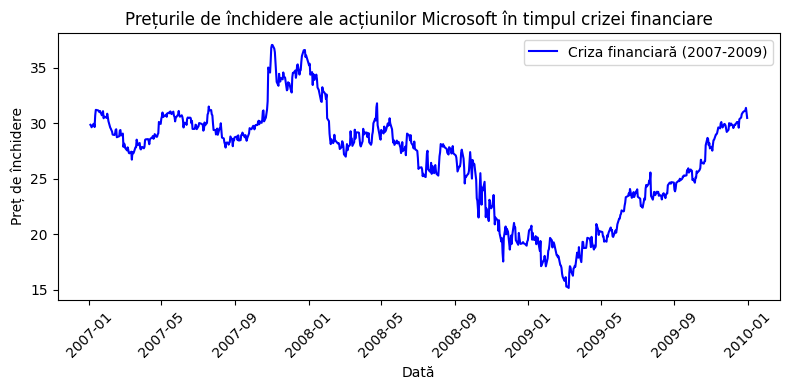

In [ ]:
# Graficul pentru prețurile de închidere ale acțiunilor pentru perioada crizei financiare
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(crisis_data.index, crisis_data['Close'], color='blue', label='Criza financiară (2007-2009)')
ax.legend()
ax.set_title('Prețurile de închidere ale acțiunilor Microsoft în timpul crizei financiare')
ax.set_xlabel('Dată')
ax.set_ylabel('Preț de închidere')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print("Pandemia")
pandemic_start = '2020-01-01'
pandemic_end = '2022-12-31'

pandemic_data = microsoft_data.loc[pandemic_start:pandemic_end]

ff3_monthly = gff.famaFrench3Factor(frequency='m')
ff3_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
ff3_monthly.set_index('Date', inplace=True)

microsoft_returns = pandemic_data['Adj Close'].resample('M').last().pct_change().dropna()
microsoft_returns.name = "Month_Rtn"
ff_data = ff3_monthly.merge(microsoft_returns,on='Date')

# Descarcă datele pentru perioada crizei financiare

rf = ff_data['RF'].mean()
market_premium = ff_data['Mkt-RF'].mean()

X = ff_data['Mkt-RF']
y =  ff_data['Month_Rtn'] - ff_data['RF']
c = sm.add_constant(X)
capm_model = sm.OLS(y, c)
result = capm_model.fit()
print(result.summary())
intercept, beta = result.params

expected_return = rf + beta*market_premium
print("CAPM Expected monthly returns: " + str(expected_return))
yearly_return = expected_return * 12
print("CAPM Expected yearly returns: " + str(yearly_return))

print("\n---------------------------------ff3-----------------------------\n")

X = ff_data[['Mkt-RF', 'SMB', 'HML']]
y = ff_data['Month_Rtn'] - ff_data['RF']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

rf = ff_data['RF'].mean()
market_premium = ff3_monthly['Mkt-RF'].mean()
size_premium = ff3_monthly['SMB'].mean()
value_premium = ff3_monthly['HML'].mean()

expected_monthly_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium
expected_yearly_return = expected_monthly_return * 12
print("Expected yearly return: " + str(expected_yearly_return))

Pandemia
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     58.02
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           9.12e-09
Time:                        12:30:43   Log-Likelihood:                 61.525
No. Observations:                  35   AIC:                            -119.0
Df Residuals:                      33   BIC:                            -115.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.007      0.837

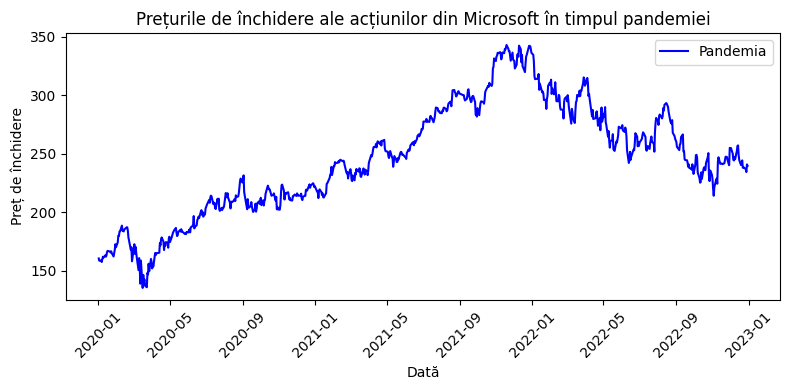

In [ ]:
# Graficul pentru prețurile de închidere ale acțiunilor pentru perioada crizei financiare
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(pandemic_data.index, pandemic_data['Close'], color='blue', label='Pandemia')
ax.legend()
ax.set_title('Prețurile de închidere ale acțiunilor din Microsoft în timpul pandemiei')
ax.set_xlabel('Dată')
ax.set_ylabel('Preț de închidere')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

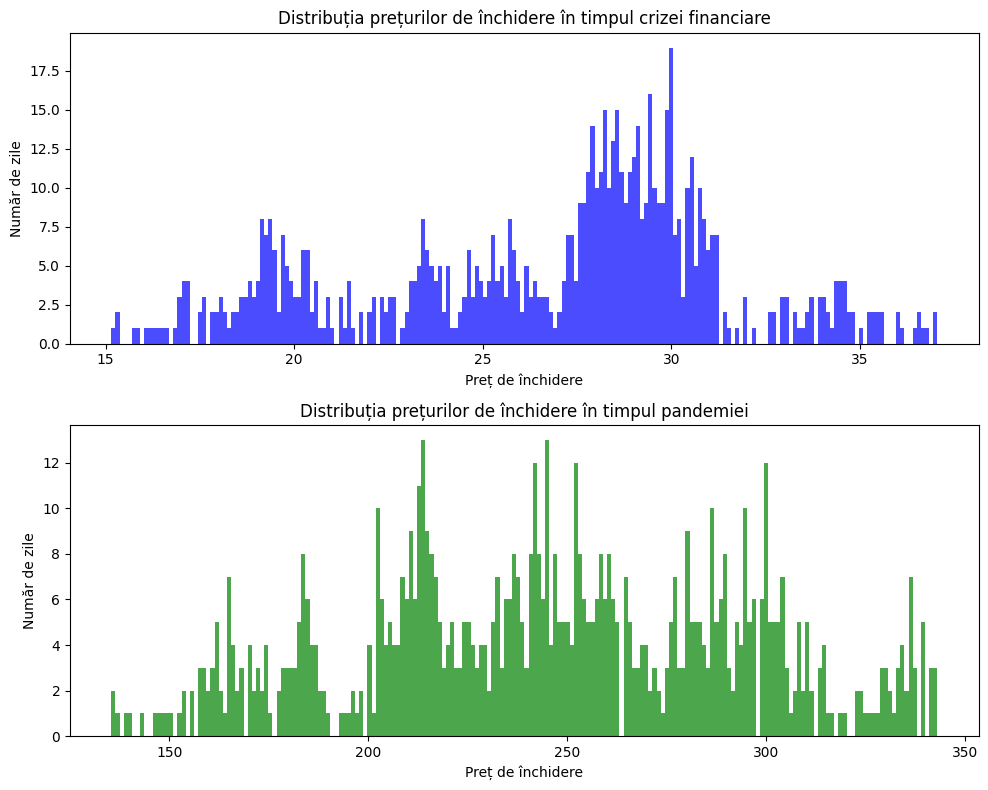

In [ ]:
import matplotlib.pyplot as plt

# Definirea figurii și axelor pentru histograme
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Histograma pentru distribuția prețurilor de închidere ale acțiunilor în timpul crizei financiare
axs[0].hist(crisis_data['Close'], bins=200, color='blue', alpha=0.7)
axs[0].set_title('Distribuția prețurilor de închidere în timpul crizei financiare')
axs[0].set_xlabel('Preț de închidere')
axs[0].set_ylabel('Număr de zile')

# Histograma pentru distribuția prețurilor de închidere ale acțiunilor în timpul pandemiei
axs[1].hist(pandemic_data['Close'], bins=200, color='green', alpha=0.7)
axs[1].set_title('Distribuția prețurilor de închidere în timpul pandemiei')
axs[1].set_xlabel('Preț de închidere')
axs[1].set_ylabel('Număr de zile')

# Afișarea histogramelelor
plt.tight_layout()
plt.show()


# LAB **4**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


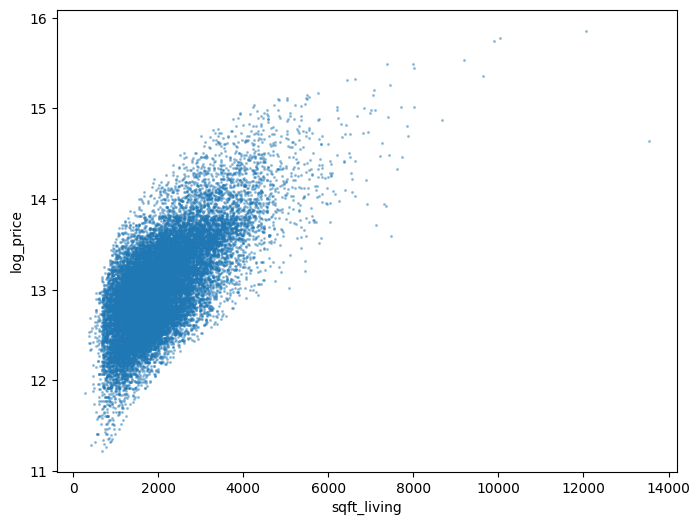

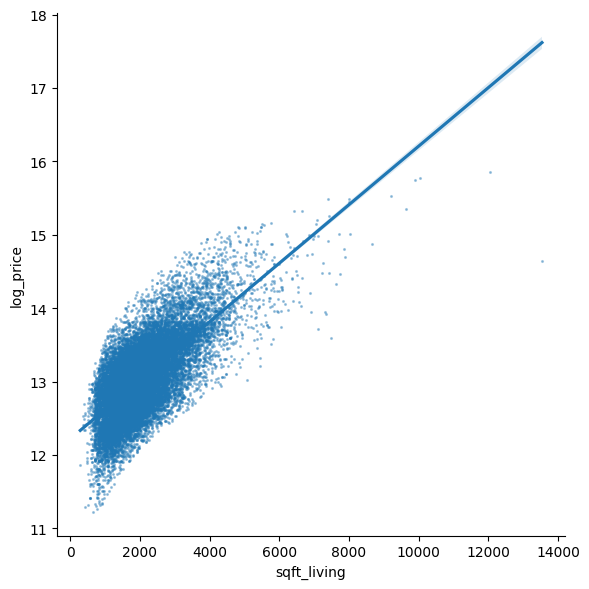

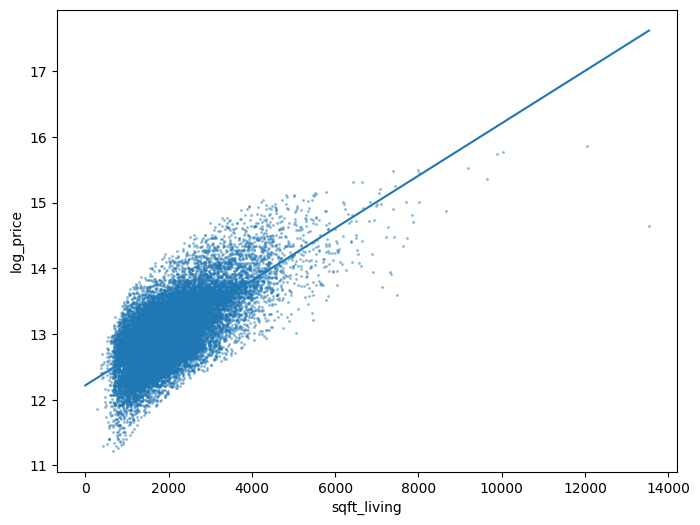

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

colors = ['#165aa7', '#cb495c', '#fec630', '#bb60d5', '#f47915', '#06ab54', '#002070', '#b27d12', '#007030']

# We will import all these here to ensure that they are loaded, but
# will usually re-import close to where they are used to make clear
# where the functions come from
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)

url = "https://datascience.quantecon.org/assets/data/kc_house_data.csv"
df = pd.read_csv(url)
df.info()

X = df.drop(["price", "date", "id"], axis=1).copy()
# convert everything to be a float for later on
for col in list(X):
    X[col] = X[col].astype(float)
X.head()

# notice the log here!
y = np.log(df["price"])
df["log_price"] = y
y.head()

def var_scatter(df, ax=None, var="sqft_living"):
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x=var , y="log_price", alpha=0.35, s=1.5, ax=ax)

    return ax

var_scatter(df);

sns.lmplot(
    data=df, x="sqft_living", y="log_price", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
);

# import
from sklearn import linear_model

# construct the model instance
sqft_lr_model = linear_model.LinearRegression()

# fit the model
sqft_lr_model.fit(X[["sqft_living"]], y)

# print the coefficients
beta_0 = sqft_lr_model.intercept_
beta_1 = sqft_lr_model.coef_[0]

print(f"Fit model: log(price) = {beta_0:.4f} + {beta_1:.4f} sqft_living")

ax = var_scatter(df)

# points for the line
x = np.array([0, df["sqft_living"].max()])
ax.plot(x, beta_0 + beta_1*x)

# Note, the argument needs to be two-dimensional. You'll see why shortly.
logp_5000 = sqft_lr_model.predict([[5000]])[0]
print(f"The model predicts a 5,000 sq. foot home would cost {np.exp(logp_5000):.2f} dollars")



The mse changed from 0.1433 to 0.1430 by including our new feature


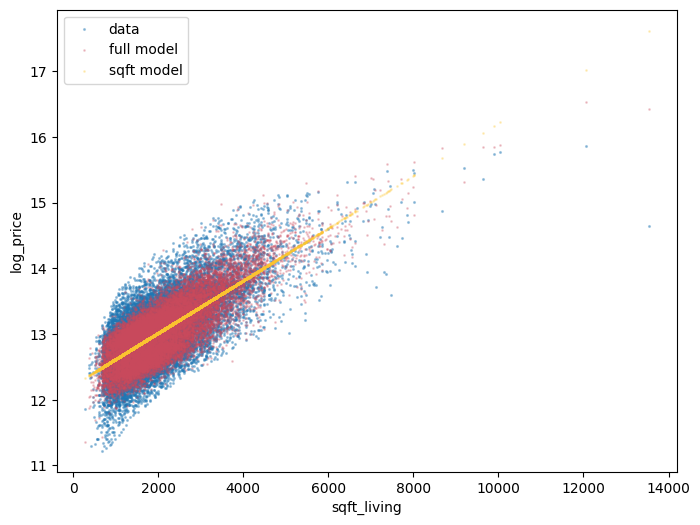

In [ ]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)


ax = var_scatter(df)

def scatter_model(mod, X, ax=None, color=colors[1], x="sqft_living"):
    if ax is None:
        _, ax = plt.subplots()

    ax.scatter(X[x], mod.predict(X), c=color, alpha=0.25, s=1)
    return ax

scatter_model(lr_model, X, ax, color=colors[1])
scatter_model(sqft_lr_model, X[["sqft_living"]], ax, color=colors[2])
ax.legend(["data", "full model", "sqft model"])

X2 = X[["sqft_living"]].copy()
X2["pct_sqft_above"] = X["sqft_above"] / X["sqft_living"]

sqft_above_lr_model = linear_model.LinearRegression()
sqft_above_lr_model.fit(X2, y)

new_mse = metrics.mean_squared_error(y, sqft_above_lr_model.predict(X2))
old_mse = metrics.mean_squared_error(y, sqft_lr_model.predict(X2[["sqft_living"]]))
print(f"The mse changed from {old_mse:.4f} to {new_mse:.4f} by including our new feature")

Streaming output truncated to the last 5000 lines.
<ipython-input-15-e007dbfdd029>:108: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-15-e007dbfdd029>:108: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-15-e007dbfdd029>:108: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-15-e007dbfdd029>:108: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a 

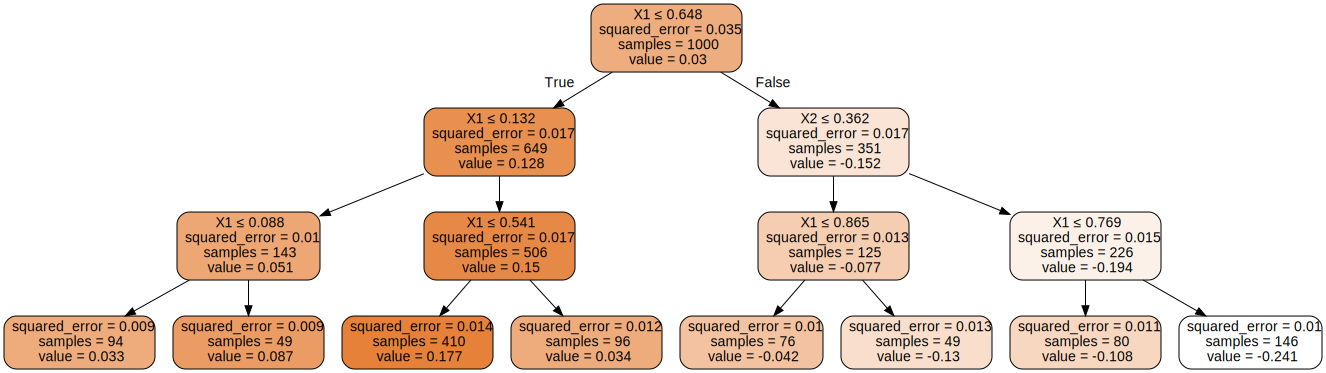

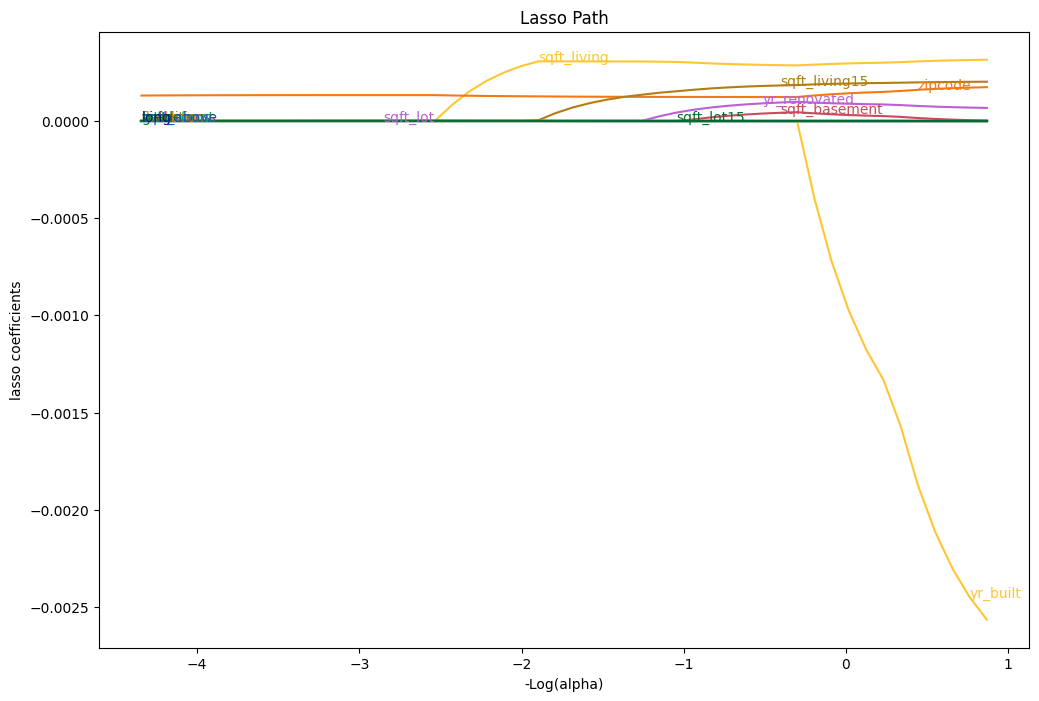

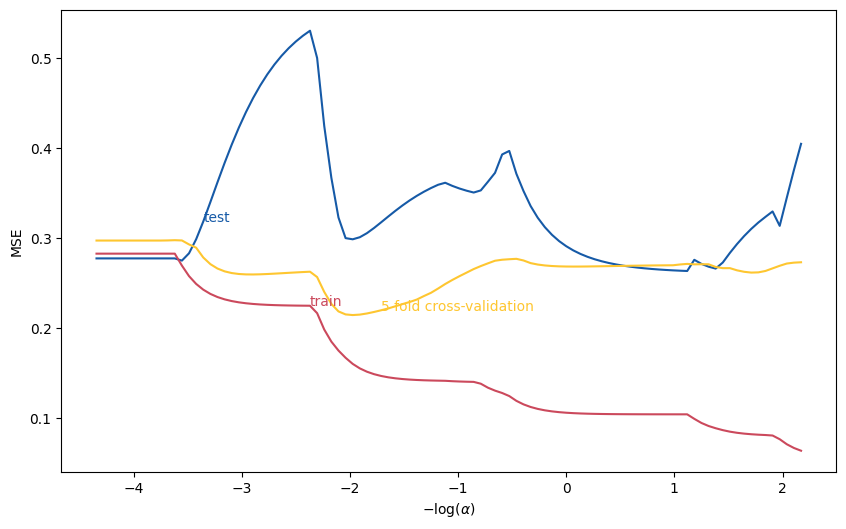

In [ ]:
lasso_model = linear_model.Lasso()
lasso_model.fit(X, y)

lasso_coefs = pd.Series(dict(zip(list(X), lasso_model.coef_)))
lr_coefs = pd.Series(dict(zip(list(X), lr_model.coef_)))
coefs = pd.DataFrame(dict(lasso=lasso_coefs, linreg=lr_coefs))

# Compute lasso for many alphas (the lasso path)
from itertools import cycle
alphas = np.exp(np.linspace(10, -2, 50))
alphas, coefs_lasso, _ = linear_model.lasso_path(X, y, alphas=alphas, max_iter=10000)

# plotting
fig, ax = plt.subplots(figsize=(12, 8))
color_cycle = cycle(colors)
log_alphas = -np.log10(alphas)
for coef_l, c, name in zip(coefs_lasso, color_cycle, list(X)):
   ax.plot(log_alphas, coef_l, c=c)
   ax.set_xlabel('-Log(alpha)')
   ax.set_ylabel('lasso coefficients')
   ax.set_title('Lasso Path')
   ax.axis('tight')
   maxabs = np.max(np.abs(coef_l))
   i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l[i]
   ax.annotate(name, (xnote, ynote), color=c)


def fit_and_report_mses(mod, X_train, X_test, y_train, y_test):
    mod.fit(X_train, y_train)
    return dict(
        mse_train=metrics.mean_squared_error(y_train, mod.predict(X_train)),
        mse_test=metrics.mean_squared_error(y_test, mod.predict(X_test))
    )

n_test = 50
X_train = X.iloc[:n_test, :]
X_test = X.iloc[n_test:, :]
y_train = y.iloc[:n_test]
y_test = y.iloc[n_test:]

fit_and_report_mses(linear_model.LinearRegression(), X_train, X_test, y_train, y_test)

fit_and_report_mses(linear_model.Lasso(), X_train, X_test, y_train, y_test)

alphas = np.exp(np.linspace(10, -5, 100))
mse = pd.DataFrame([fit_and_report_mses(linear_model.Lasso(alpha=alpha, max_iter=50000),
                           X_train, X_test, y_train, y_test)
                    for alpha in alphas])
mse["log_alpha"] = -np.log10(alphas)
fig, ax = plt.subplots(figsize=(10,6))
mse.plot(x="log_alpha", y="mse_test", c=colors[0], ax=ax)
mse.plot(x="log_alpha", y="mse_train", c=colors[1], ax=ax)
ax.set_xlabel(r"$-\log(\alpha)$")
ax.set_ylabel("MSE")
ax.get_legend().remove()
ax.annotate("test",(mse.log_alpha[15], mse.mse_test[15]),color=colors[0])
ax.annotate("train",(mse.log_alpha[30], mse.mse_train[30]),color=colors[1])


from sklearn.model_selection import cross_val_score
mse["cv"] = [-np.mean(cross_val_score(linear_model.Lasso(alpha=alpha, max_iter=50000),
                                  X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
          for alpha in alphas]
mse.plot(x="log_alpha", y="cv", c=colors[2], ax=ax)
ax.annotate("5 fold cross-validation", (mse.log_alpha[40], mse.cv[40]), color=colors[2])
ax.get_legend().remove()
ax.set_xlabel(r"$-\log(\alpha)$")
ax.set_ylabel("MSE")
fig


# LassoCV exploits special structure of lasso problem to minimize CV more efficiently
lasso = linear_model.LassoCV(cv=5).fit(X_train,y_train)
-np.log10(lasso.alpha_) # should roughly = minimizer on graph, not exactly equal due to random splitting

# note test_size=0.25 is the default value, but is shown here so you
# can see how to change it
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)


import numpy as np
# Simulate some data and plot it
n = 1000
Xsim = np.random.rand(n,2)
def Ey_x(x):
    return 1/3*(np.sin(5*x[0])*np.sqrt(x[1])*np.exp(-(x[1]-0.5)**2))

ysim = np.apply_along_axis(Ey_x, 1, Xsim) + np.random.randn(n)*0.1


import plotly.graph_objects as go


def surface_scatter_plot(X,y,f, xlo=0., xhi=1., ngrid=50,
                         width=860, height=700, f0=Ey_x, show_f0=False):
    scatter = go.Scatter3d(x=X[:,0],y=X[:,1],z=y,
                           mode='markers',
                           marker=dict(size=2, opacity=0.3)
    )
    xgrid = np.linspace(xlo,xhi,ngrid)
    ey = np.zeros((len(xgrid),len(xgrid)))
    ey0 = np.zeros((len(xgrid),len(xgrid)))
    colorscale = [[0, colors[0]], [1, colors[2]]]
    for i in range(len(xgrid)):
        for j in range(len(xgrid)):
            ey[j,i] = f([xgrid[i],xgrid[j]])
            ey0[j,i]= f0([xgrid[i],xgrid[j]])
    surface = go.Surface(x=xgrid, y=xgrid, z=ey, colorscale=colorscale, opacity=1.0)
    if (show_f0):
        surface0 = go.Surface(x=xgrid, y=xgrid, z=ey0, opacity=0.8, colorscale=colorscale)
        layers = [scatter, surface, surface0]
    else:
        layers = [scatter, surface]
    fig = go.FigureWidget(
        data=layers,
        layout = go.Layout(
            autosize=True,
            scene=dict(
                xaxis_title='X1',
                yaxis_title='X2',
                zaxis_title='Y'
            ),
            width=width,
            height=height,
        )
    )
    return fig

fig = surface_scatter_plot(Xsim, ysim, Ey_x)
fig


from sklearn import tree
fitted_tree = tree.DecisionTreeRegressor(max_depth=3).fit(Xsim,ysim)
fig=surface_scatter_plot(
    Xsim, ysim, lambda x: fitted_tree.predict([x]), show_f0=True
)
fig

import graphviz
tree_graph = tree.export_graphviz(fitted_tree, out_file=None,
                                  feature_names=["X1", "X2"],
                                  filled=True, rounded=True,
                                  special_characters=True)
display(graphviz.Source(tree_graph))



# LAB **3**

In [ ]:
# Seminar 4


# LAB **2**

Th etype of christmas is:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
pandas interprets December 25, 2017 as 2017-12-25 00:00:00
pandas interprets Dec. 25, 2017 as 2017-12-25 00:00:00
pandas interprets Monday, Dec. 25, 2017 as 2017-12-25 00:00:00
pandas interprets 25 Dec. 2017 as 2017-12-25 00:00:00
pandas interprets 25th Dec. 2017 as 2017-12-25 00:00:00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2599 entries, 2014-05-01 to 2021-06-20
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2599 non-null   float64
 1   High               2599 non-null   float64
 2   Low                2599 non-null   float64
 3   Close              2599 non-null   float64
 4   Volume (BTC)       2599 non-null   float64
 5   Volume (Currency)  2599 non-null   float64
 6   Weighted Price     2599 non-null   float64
dtypes: float64(7)
memory usage: 162.4 KB
Tendința de creștere din ultimul an e

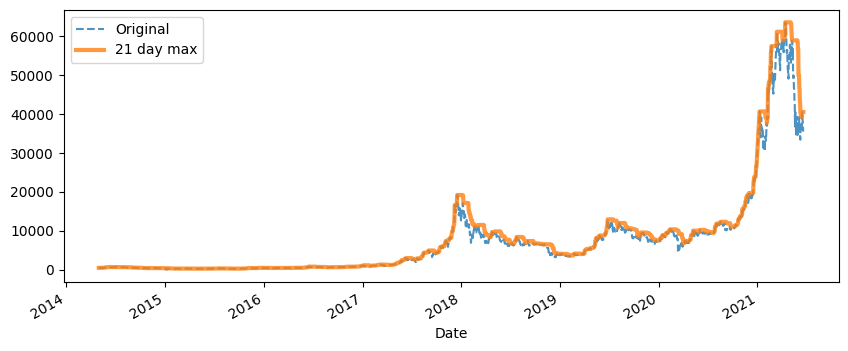

In [ ]:
#%% exercitii
'''
unemp_all = (unemp_raw
             .reset_index()
             .pivot_table(index = "Date", columns = "state", values = "UnemploymentRate"))
unemp_all.head()
unemp.plot(figsize = (8, 6))
unemp_all.mean()

def standardize_data(x):
  mu = x.mean()
  std = x.std()
  return (x - mu)/std

#std_unemp = unemp_all.apply(standardize_data)
#std_unemp.head()


def transformation(x):
  if high_or_low(s) == "high":
    return (standardize_data(x))**2
  else:
    return standardize_data(x)

unemp_all = (unemp_raw
             .reset_index()
             .pivot_table(index = "Date", columns = "state", values = "UnemploymentRate"))

std_unemp2 = unemp_all.apply(transformation)
#std_unemp2.head()
print(std_unemp2)


# solutia lui:
def func2(x, s):
  mu = x.mean()
  std = x.std()
  if s.mean() < 4.0:
    return (x - mu)/std
  elif s.mean() >= 4.0 and s.mean() <= 6.5:
      return (x - mu)/std
  elif s.mean() >= 6.5:
    return (x - mu)**2/std**2
  return out

unemp_all.agg(func2)
'''

#%% partea a 2a
quandl.ApiConfig.api_key = os.environ.get("Quandl AUTH", "nPhyVrYLNTMnEz7Tm3RF")
start_date = "2014-05-01"

%matplotlib inline

christmas_str = "2017-12-25"

christmas = pd.to_datetime(christmas_str)
print("Th etype of christmas is: ", type(christmas))

for date in ["December 25, 2017", "Dec. 25, 2017", "Monday, Dec. 25, 2017", "25 Dec. 2017", "25th Dec. 2017"]:
      print("pandas interprets {} as {}".format(date, pd.to_datetime(date)))

'''
christmas_amzn = "2017-12-25T00:00:00+ 00 :00"
pd.to_datetime(christmas_amzn)

amzn_strftime = "XY-Xm-XdTXh:Xm:Xs+ 00 :00"
pd.to_datetime(amzn_strftime)
'''

btc_usd = quandl.get("BCHARTS/BITSTAMPUSD", start_date = start_date)
btc_usd.info()
btc_usd.head()

btc_usd.loc["2015"]
btc_usd.loc["August 2015"]
btc_usd.loc["08/2017"]
btc_usd.loc["August 1, 2015"]
btc_usd.loc["April 1, 2015":"April 30, 2015"]
btc_usd.head()
btc_usd.shift().head()

((btc_usd - btc_usd.shift()) - btc_usd.shift()).head()

btc_usd.shift(-2).head()
btc_usd.shift(-2).tail()

btc_small = btc_usd.head(6)
btc_small

btc_small.rolling("2d").mean()

fig, ax = plt.subplots(figsize = (10, 4))
btc_usd["Open"].plot(ax = ax, linestyle = '--', alpha = 0.8)
btc_usd.rolling("21d").max()["Open"].plot(ax = ax, alpha = 0.8, linewidth = 3)
ax.legend(["Original", "21 day max"])

def is_volatine(x):
  if x.var() > 1.0:     # .var() <- varianta
    return 1.0
  else:
    return 0.0

btc_small.rolling("2d").apply(is_volatine)
#ex
#identificati pe baza functiei rolling, resp a unor statistici de baza
#perioadele de crestere accelerata/speculativa (de ex: cresterea din ultima perioada(luna) este cu mult peste 50%)
#tendinta de crestere din ultimul an
#in ce masura cresterea accelerata indica o probabilitate crescuta de ajustare
'''
def crestereA_S():
  for prioada in ...:
    if btc_usd.rolling("2d"):
      pass


def tendinta_crestere():
  pass
'''

btc_usd.rolling("365d")
btc_usd.rolling("30d")
















def crestereA_S(dataframe):
    ultima_luna = dataframe.index[-1].month
    ultimul_an = dataframe.index[-1].year
    luna_curenta = dataframe[dataframe.index.month == ultima_luna]
    cresteri_luna_curenta = (luna_curenta["Close"] - luna_curenta["Open"]) / luna_curenta["Open"] * 100

    cresteri_accelerate = cresteri_luna_curenta[cresteri_luna_curenta > 50]
    if not cresteri_accelerate.empty:
        print("Există perioade de creștere accelerată/speculativă în ultima lună.")

    medie_anuala = dataframe["Close"].rolling("365d").mean()
    trend = "stabil"
    if medie_anuala.iloc[-1] > medie_anuala.iloc[0]:
        trend = "în creștere"
    elif medie_anuala.iloc[-1] < medie_anuala.iloc[0]:
        trend = "în scădere"

    print("Tendința de creștere din ultimul an este:", trend)

    if not cresteri_accelerate.empty:
        ajustari_viitoare = dataframe["Close"].iloc[-1] - dataframe["Close"].iloc[-2]
        if ajustari_viitoare < 0:
            print("Creșterea accelerată este urmată de o ajustare negativă în preț.")
        elif ajustari_viitoare > 0:
            print("Creșterea accelerată este urmată de o ajustare pozitivă în preț.")
        else:
            print("Creșterea accelerată nu pare să fie urmată de o ajustare semnificativă în preț.")
    else:
        print("Nu există perioade de creștere accelerată/speculativă în ultima lună.")

crestereA_S(btc_usd)


# LAB **1**

In [ ]:
#Series: example
values = [5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8., 5.7]
years = list(range(1995, 2017, 2))

#pd.Series?            #create a Series
unemp = pd.Series(data = values, index = years, name = "Unemployment")

#functions
unemp
unemp.index
unemp.values
unemp.plot()

#get the value in a year
unemp.loc[1995]
s = 0
for i in range(len(values)):
  s = s + values[i]
media = s / len(values)     # sau sum(values) / len(values)

print("Media este: ", media)

val_nou = values
for i in range(len(values)):
  val_nou[i] = values[i] - media

unemp_nou = pd.Series(data = values, index = years, name = "Unemployment 2")
unemp_nou.plot()

## functia mean
mean = stat.mean(unemp)
unemp = unemp - mean
unemp.plot()


In [ ]:
data = {
        "NorthEast": [5.9, 5.6, 4.4, 3.8, 5.8, 4.9, 4.3, 7.1, 8.3, 7.9, 5.7],
        "MidWest": [4.5, 4.3, 3.6, 4., 5.7, 5.7, 4.9, 8.1, 8.7, 7.4, 5.1],
        "South": [5.3, 5.2, 4.2, 4., 5.7, 5.2, 4.3, 7.6, 9.1, 7.4, 5.5],
        "West": [6.6, 6., 5.2, 4.6, 6.5, 5.5, 4.5, 8.6, 10.7, 8.5, 6.1],
        "National": [5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8., 5.7]}

unemp_region = pd.DataFrame(data, index = years)
unemp_region

#function
unemp_region.index
unemp_region.head(3)
unemp_region.tail(3)

unemp_region.plot()

print(unemp_region)

'''
for i in years:
  unemp_ex = pd.Series(data = values, index = i, name = "Unemployment")
  media_ani = sum(values) / len(years)
print(media_ani)
'''

#for i in range(len(data)):
mean = unemp_region.mean(axis = 1)

unemp_mean = pd.Series(data = mean, index = years, name = "Media pe an")
unemp_mean
unemp_mean.plot()


#lista = []
# for i in years:
#   lista.append(unemp_mean.loc[i, :].mean())



Media este:  5.972727272727273
      NorthEast  MidWest  South  West  National
1995        5.9      4.5    5.3   6.6       5.6
1997        5.6      4.3    5.2   6.0       5.3
1999        4.4      3.6    4.2   5.2       4.3
2001        3.8      4.0    4.0   4.6       4.2
2003        5.8      5.7    5.7   6.5       5.8
2005        4.9      5.7    5.2   5.5       5.3
2007        4.3      4.9    4.3   4.5       4.6
2009        7.1      8.1    7.6   8.6       7.8
2011        8.3      8.7    9.1  10.7       9.1
2013        7.9      7.4    7.4   8.5       8.0
2015        5.7      5.1    5.5   6.1       5.7


state
Alabama           medium
Alaska              high
Arizona           medium
Arkansas          medium
California          high
Colorado          medium
Connecticut       medium
Delaware          medium
Florida           medium
Georgia           medium
Hawaii            medium
Idaho             medium
Illinois            high
Indiana           medium
Iowa              medium
Kansas            medium
Kentucky            high
Louisiana         medium
Maine             medium
Maryland          medium
Massachusetts     medium
Michigan            high
Minnesota         medium
Mississippi         high
Missouri          medium
Montana           medium
Nebraska             low
Nevada              high
New Hampshire     medium
New Mexico        medium
New York          medium
New jersey        medium
North Carolina      high
North Dakota         low
Ohio              medium
Oklahoma          medium
Oregon              high
Pennsylvania      medium
Rhode island        high
South Carolina     

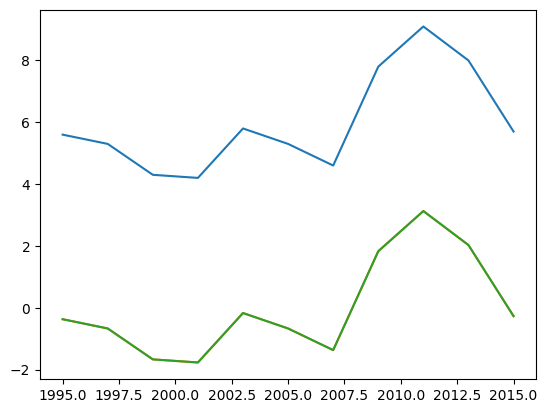

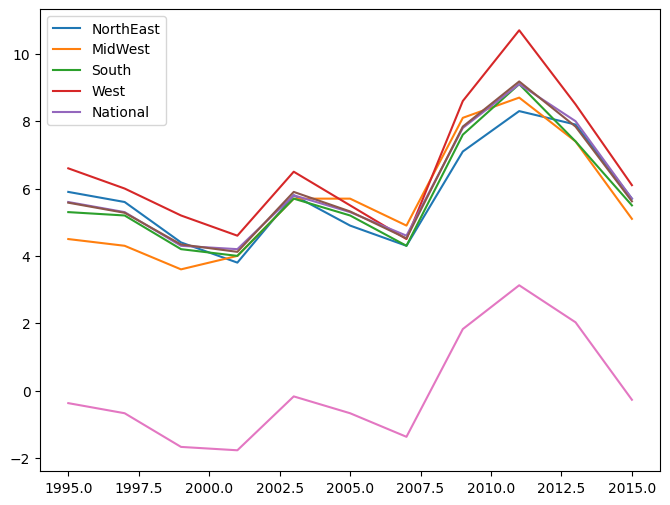

In [ ]:

ssl._create_default_https_context = ssl._create_unverified_context

url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates = ["Date"])

unemp_raw.head()         #inspect the data

unemp_all = (unemp_raw
             .reset_index()
             .pivot_table(index = "Date", columns = "state", values = "UnemploymentRate"))
unemp_all.head()
unemp.plot(figsize = (8, 6))
unemp_all.mean()

def high_or_low(s):
  """
  This function takes a pandas Series object and returns high
  if the mean is above 6.5 and low if the mean is below
  """
  if s.mean() < 6.5:
    out = "low"
  else:
    out = "high"
  return out

unemp_all.agg(high_or_low)

def func2(s):
  if s.mean() < 4.0:
    out = "low"
  elif s.mean() >= 4.0 and s.mean() <= 6.5:
      out = "medium"
  elif s.mean() >= 6.5:
    out = "high"
  return out

unemp_all.agg(func2)


# New section